In [132]:
import pandas as pd

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [133]:
df = pd.read_csv("us-counties.csv")
df['date'] = df['date'].apply(pd.to_datetime)

df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1780869,2021-10-03,Sweetwater,Wyoming,56037.0,6959,65.0
1780870,2021-10-03,Teton,Wyoming,56039.0,4943,13.0
1780871,2021-10-03,Uinta,Wyoming,56041.0,3550,25.0
1780872,2021-10-03,Washakie,Wyoming,56043.0,1397,27.0


#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [134]:
wanted_cols = ['date','county','state','fips','cases','deaths']
grouped_cases = df.groupby(by=['fips'],as_index=False).max().sort_values(by='cases',ascending=False).head(10)
#top_10_counties = df[df['fips'].isin(grouped_cases['fips'].tolist())]
top_10_counties = grouped_cases[['fips']].merge(df,how='left',left_on='fips',right_on='fips')[wanted_cols]

top_10_counties

,date,county,state,fips,cases,deaths
0,2020-01-26,Los Angeles,California,6037.0,1,0.0
1,2020-01-27,Los Angeles,California,6037.0,1,0.0
2,2020-01-28,Los Angeles,California,6037.0,1,0.0
3,2020-01-29,Los Angeles,California,6037.0,1,0.0
4,2020-01-30,Los Angeles,California,6037.0,1,0.0
...,...,...,...,...,...,...
5894,2021-09-29,Broward,Florida,12011.0,346392,4402.0
5895,2021-09-30,Broward,Florida,12011.0,346392,4402.0
5896,2021-10-01,Broward,Florida,12011.0,349793,4402.0
5897,2021-10-02,Broward,Florida,12011.0,349793,4402.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [135]:
wanted_cols = ['date','county','state','fips','cases','deaths']
grouped_cases = df.groupby(by=['state'],as_index=False).max().sort_values(by='cases',ascending=False).head(5)
top_5_states = grouped_cases[['state']].merge(df,how='left',left_on='state',right_on='state')[wanted_cols]

top_5_states

,date,county,state,fips,cases,deaths
0,2020-01-25,Orange,California,6059.0,1,0.0
1,2020-01-26,Los Angeles,California,6037.0,1,0.0
2,2020-01-26,Orange,California,6059.0,1,0.0
3,2020-01-27,Los Angeles,California,6037.0,1,0.0
4,2020-01-27,Orange,California,6059.0,1,0.0
...,...,...,...,...,...,...
169096,2021-10-03,Whiteside,Illinois,17195.0,8183,219.0
169097,2021-10-03,Will,Illinois,17197.0,88614,1175.0
169098,2021-10-03,Williamson,Illinois,17199.0,11742,177.0
169099,2021-10-03,Winnebago,Illinois,17201.0,39707,580.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [136]:
top_10_county_list = top_10_counties['fips'].drop_duplicates().tolist()
# sort by date for each county
for i in range(len(top_10_county_list)):
    working_df = df[df['fips']==top_10_county_list[i]].sort_values(['date'])[['cases']].diff()
    working_df.iloc[0,0]=0.0
    working_df = working_df.rename(columns={'cases': 'incidence'})
    current_df = df.merge(working_df, how = 'right',left_index=True,right_index=True)[['date','county','fips','incidence']]
    if (i==0):
        incidence_df = current_df
    else:
        incidence_df = pd.concat([incidence_df,current_df])
    
incidence_df

,date,county,fips,incidence
9,2020-01-26,Los Angeles,6037.0,0.0
14,2020-01-27,Los Angeles,6037.0,0.0
19,2020-01-28,Los Angeles,6037.0,0.0
24,2020-01-29,Los Angeles,6037.0,0.0
29,2020-01-30,Los Angeles,6037.0,0.0
...,...,...,...,...
1764954,2021-09-29,Broward,12011.0,0.0
1768203,2021-09-30,Broward,12011.0,0.0
1771452,2021-10-01,Broward,12011.0,3401.0
1774702,2021-10-02,Broward,12011.0,0.0


#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [137]:
wanted_cols = ['date','county','state','fips','incidence']
incidence_top_10 = incidence_df.groupby(by='fips').max()[['date','incidence']].merge(unique_counties,how='left',left_on='fips',right_on='fips')
incidence_top_10 = incidence_top_10[wanted_cols].sort_values('incidence',ascending=False)

incidence_top_10

,date,county,state,fips,incidence
1,2021-10-03,Los Angeles,California,6037.0,29174.0
6,2021-10-03,Miami-Dade,Florida,12086.0,21655.0
4,2021-10-03,San Diego,California,6073.0,15453.0
5,2021-10-03,Broward,Florida,12011.0,14666.0
9,2021-10-03,Harris,Texas,48201.0,14129.0
0,2021-10-03,Maricopa,Arizona,4013.0,11761.0
2,2021-10-03,Riverside,California,6065.0,8341.0
3,2021-10-03,San Bernardino,California,6071.0,8026.0
7,2021-10-03,Cook,Illinois,17031.0,6697.0
8,2021-10-03,Dallas,Texas,48113.0,6162.0


#### Question 5: Plot an incidence curve for the County with the highest peak.

<AxesSubplot:xlabel='date'>

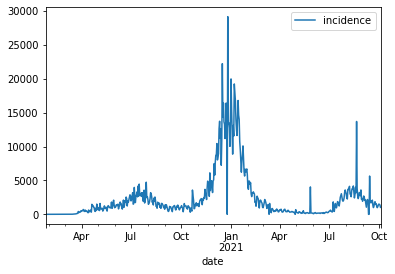

In [138]:
highest_peak_county=incidence_top_10.iloc[0,3]
highest_peak_incidences = incidence_df[incidence_df['fips']==highest_peak_county][['date','incidence']]

highest_peak_incidences.plot(x='date',y='incidence')

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

<AxesSubplot:xlabel='county'>

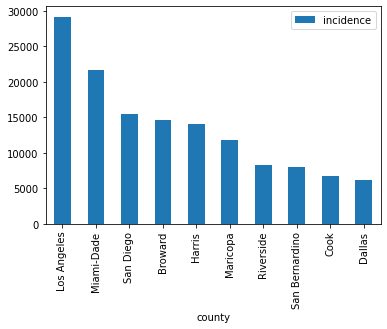

In [139]:
incidence_top_10.plot.bar(x='county',y='incidence')